# LangGraph: Multiple Inputs

# LangGraph 101: Handling Multiple Inputs


In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END

# Define the shape of our state
class AgentState(TypedDict):
    scores: List[float]
    multiplier: float
    scaled_scores: List[float]
    summary: str


### Defining the State


## Node Definitions

In [3]:
# Node 1: Scale each score by the multiplier
def scale_scores(state: AgentState) -> AgentState:
    original = state["scores"]
    factor = state["multiplier"]
    state["scaled_scores"] = [s * factor for s in original]
    print(f"Scaled {original} by {factor} → {state['scaled_scores']}")
    return state

# Node 2: Generate a summary message
def make_summary(state: AgentState) -> AgentState:
    scaled = state["scaled_scores"]
    avg = sum(scaled) / len(scaled) if scaled else 0
    state["summary"] = (
        f"With multiplier {state['multiplier']}, "
        f"your scores become {scaled} and the average is {avg:.2f}."
    )
    print(state["summary"])
    return state

### Node Functions

We define two nodes:
- `scale_scores`: Scales each score by the multiplier.
- `make_summary`: Generates a summary message based on the scaled scores.


## Graph Construction

In [4]:
# Build the graph
graph = StateGraph(AgentState)
graph.add_node("scale", scale_scores)
graph.add_node("summarize", make_summary)

# Wire up the flow: after "scale" go to "summarize", then finish
graph.add_edge("scale", "summarize")
graph.add_edge("summarize", END)

graph.set_entry_point("scale")
graph.set_finish_point("summarize")

# Compile and run
app = graph.compile()


### Building the Graph


## Graph Visualization

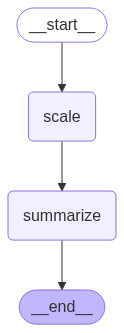

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

### Visualizing the Graph


## Testing the Summary Graph


In [6]:
result = app.invoke({
    "scores": [10, 20, 30],
    "multiplier": 1.5
})

print("\nFinal summary:", result["summary"])

Scaled [10, 20, 30] by 1.5 → [15.0, 30.0, 45.0]
With multiplier 1.5, your scores become [15.0, 30.0, 45.0] and the average is 30.00.

Final summary: With multiplier 1.5, your scores become [15.0, 30.0, 45.0] and the average is 30.00.


### Running the Summary Graph


## Grade Calculation

In [8]:
class StudentState(TypedDict):
    scores: List[float]
    student_name: str
    course_name: str
    grade_report: str


## Grade Calculation Example

In [9]:
def calculate_grade(state: StudentState) -> StudentState:
    """Calculate final grade and generate a report from multiple inputs"""
    print(f"Processing grades for: {state}")
    
    # Calculate average score
    average_score = sum(state["scores"]) / len(state["scores"])
    
    # Determine letter grade
    if average_score >= 90:
        letter_grade = "A"
    elif average_score >= 80:
        letter_grade = "B"
    elif average_score >= 70:
        letter_grade = "C"
    elif average_score >= 60:
        letter_grade = "D"
    else:
        letter_grade = "F"
    
    # Generate comprehensive report
    state["grade_report"] = (
        f"Student: {state['student_name']}\n"
        f"Course: {state['course_name']}\n"
        f"Individual Scores: {', '.join(map(str, state['scores']))}\n"
        f"Average Score: {average_score:.2f}%\n"
        f"Final Grade: {letter_grade}"
    )
    
    print(f"Completed processing: {state['grade_report']}")
    return state


### Defining Student State and Grade Calculation Node

We define a new state for student data and a node to calculate the final grade and generate a report.


In [10]:
graph = StateGraph(StudentState)

graph.add_node("grade_calculator", calculate_grade)
graph.set_entry_point("grade_calculator")  # Set the starting node
graph.set_finish_point("grade_calculator")  # Set the ending node

app = graph.compile()  # Compiling the graph



### Building the Grade Calculation Graph

We construct and compile the graph for the grade calculation workflow.


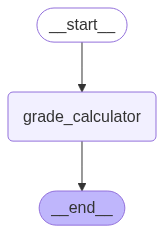

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))



### Visualizing the Grade Calculation Graph

In [12]:
# Test with sample student data
result = app.invoke({
    "scores": [88.5, 92.0, 85.5, 94.0, 87.5], 
    "student_name": "Alice Johnson",
    "course_name": "Python Programming"
})

print(result["grade_report"])


Processing grades for: {'scores': [88.5, 92.0, 85.5, 94.0, 87.5], 'student_name': 'Alice Johnson', 'course_name': 'Python Programming'}
Completed processing: Student: Alice Johnson
Course: Python Programming
Individual Scores: 88.5, 92.0, 85.5, 94.0, 87.5
Average Score: 89.50%
Final Grade: B
Student: Alice Johnson
Course: Python Programming
Individual Scores: 88.5, 92.0, 85.5, 94.0, 87.5
Average Score: 89.50%
Final Grade: B
